# Problem statement

Understanding why and when in Facial Inc.the number of turnover increases rapidly in the latest months. The HR department is required to find out the reasons behind this phenomenon.
The employee turnover  is a costly problem for companies and often is difficult  replacing an employee with good skills.
Often the turnover takes more time on the part of HR for interview and test to find to find good resources and not slow down business productivity.
To resolve this problem for Facial Inc. can improve employee retention as well as possibly planning new hiring in advance.

# My approach to analyzing the problem



1) Analyze the data provided by Facial Inc. in the dataset called datasetV2.

2) Understand the key indicators of an employee leaving the company.

3) Understand likelihood of an active employee leaving the company.

4) Find the good policies or strategies  to improve employee retention.

Considering the dataset of Facial Inc., with data about employee that leave ("turnover Yes") or not leave ("turnover No") the company, this is a standard supervised classification problem where the label is a binary variable.



# Dataset Analysis

In the first step of this work I analyze the data in dataset V2 from Facial Inc. where we find 2000 employees that have leave or not leave the company,  the number of leave is less than the number of current employees.


# Importing Python libraries

In [142]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans


In [143]:
#Importing and read data
pathScripts="C:\\Users\\antonio.castiglione\\codiciPy\\"
df=pd.read_csv(pathScripts+'\\dataset_V2.csv')

In [144]:
# Check to see if there are any missing values in our data set
df.isnull().any()

birthday                       False
gender                         False
level                          False
position                       False
department                     False
education_level                False
major                          False
experience                     False
senority                       False
current_position_experience    False
time_with_line_manager         False
salary                         False
stock_option_level             False
num_working_hours              False
workplace_requirement_level    False
overtime                       False
performance_level              False
work_travel_frequency          False
work_satisfaction_level        False
num_job_changes                False
status                         False
home_distance                  False
coworker_relationship_level    False
training_frequency             False
turnover                       False
dtype: bool

In [145]:
#Manipulation birthday column and recalled age, I think is better have the age of employees than birthday
#Age is more pratically for the analysis
df['age']=df['birthday'].apply(lambda x: x.split('/')[-1])
df['year']='19'
df['age']=df['year']+df['age']
df['age']=pd.to_numeric(df['age'])
df['age']=2019-df['age']
front = df['age']
df.drop(labels=['year','age','birthday'], axis=1,inplace = True)
df.insert(0,'age',  front)


In [146]:
#working hours is a costant, we can remove
df.drop(labels=['num_working_hours'], axis=1,inplace = True)

In [147]:
# Looks like about 90% of employees stayed and 10% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 2000
turnover_rate

No     0.9
Yes    0.1
Name: turnover, dtype: float64

In [148]:
#analyze the types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
age                            2000 non-null int64
gender                         2000 non-null object
level                          2000 non-null int64
position                       2000 non-null object
department                     2000 non-null object
education_level                2000 non-null object
major                          2000 non-null object
experience                     2000 non-null int64
senority                       2000 non-null int64
current_position_experience    2000 non-null int64
time_with_line_manager         2000 non-null int64
salary                         2000 non-null int64
stock_option_level             2000 non-null int64
workplace_requirement_level    2000 non-null object
overtime                       2000 non-null object
performance_level              2000 non-null object
work_travel_frequency          2000 non-null object
work_satisfaction

In [149]:
#The dataset contains several numerical and categorical columns
#CONVERT  VARIABLES IN categories
df['turnover']=df['turnover'].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
df['gender']=df['gender'].astype('category').cat.reorder_categories(['Female','Male']).cat.codes
df['overtime']=df['overtime'].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
df['status']=df['status'].astype('category').cat.reorder_categories(['Single','Married','Divorced']).cat.codes


In [150]:
#convert in categories and rename some variables
#I prefer to rename some variables for greater practicality
df=df.rename(columns={'work_satisfaction_level':'satisfaction'})
df['satisfaction']=df['satisfaction'].astype('category').cat.reorder_categories(['low', 'medium','high','very high']).cat.codes

df=df.rename(columns={'performance_level':'performance'})
df['performance']=df['performance'].astype('category').cat.reorder_categories(['outstanding','execellent']).cat.codes

df=df.rename(columns={'workplace_requirement_level':'workplace_requirement'})
df['workplace_requirement']=df['workplace_requirement'].astype('category').cat.reorder_categories(['low', 'medium','high','very high']).cat.codes

df=df.rename(columns={'coworker_relationship_level':'coworker_relationship'})
df['coworker_relationship']=df['coworker_relationship'].astype('category').cat.reorder_categories(['average', 'good','outstanding','execellent']).cat.codes

df=df.rename(columns={'training_frequency':'training'})
df['training']=df['training'].astype('category').cat.reorder_categories(['none','rarely','frequently']).cat.codes

df=df.rename(columns={'work_travel_frequency':'travel'})   
df['travel']=df['travel'].astype('category').cat.reorder_categories(['none','low','high']).cat.codes


In [151]:
# Display the statistical overview of the employees after handling some categorical variables
describe=df.describe()
describe

,age,gender,level,experience,senority,current_position_experience,time_with_line_manager,salary,stock_option_level,workplace_requirement,overtime,performance,travel,satisfaction,num_job_changes,status,home_distance,coworker_relationship,training,turnover
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.107500,0.664000,2.115500,11.52800,7.339500,4.511500,4.360000,6648.138000,0.904000,1.84600,0.306000,0.81250,1.016000,1.828500,2.735500,0.831500,9.090500,1.825000,1.049000,0.100000
std,8.700793,0.472457,1.122404,7.63265,5.969678,3.549953,3.455484,4791.261804,0.829535,1.04155,0.460945,0.39041,0.517569,1.058134,2.363331,0.698106,7.673901,1.045429,0.525107,0.300075
min,20.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1009.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,6.00000,3.000000,2.000000,2.000000,2996.000000,0.000000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000
50%,38.000000,1.000000,2.000000,10.00000,6.000000,3.000000,3.000000,5015.500000,1.000000,2.00000,0.000000,1.00000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000,1.000000,0.000000
75%,45.000000,1.000000,3.000000,15.00000,10.000000,7.000000,7.000000,8620.250000,1.000000,3.00000,1.000000,1.00000,1.000000,3.000000,4.000000,1.000000,13.000000,3.000000,1.000000,0.000000
max,62.000000,1.000000,5.000000,40.00000,40.000000,18.000000,17.000000,19999.000000,3.000000,3.00000,1.000000,1.00000,2.000000,3.000000,9.000000,2.000000,29.000000,3.000000,2.000000,1.000000


In [152]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
tsummary=turnover_Summary.mean()
tsummary

,age,gender,level,experience,senority,current_position_experience,time_with_line_manager,salary,stock_option_level,workplace_requirement,overtime,performance,travel,satisfaction,num_job_changes,status,home_distance,coworker_relationship,training
turnover,,,,,,,,,,,,,,,,,,,
0,39.535556,0.670556,2.170556,11.917222,7.576111,4.677778,4.520556,6862.514444,0.949444,1.884444,0.281111,0.810,0.990556,1.867778,2.760556,0.856111,8.880556,1.856111,1.043889
1,35.255000,0.605000,1.620000,8.025000,5.210000,3.015000,2.915000,4718.750000,0.495000,1.500000,0.530000,0.835,1.245000,1.475000,2.510000,0.610000,10.980000,1.545000,1.095000


# Correlation Matrix & Heatmap 

Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

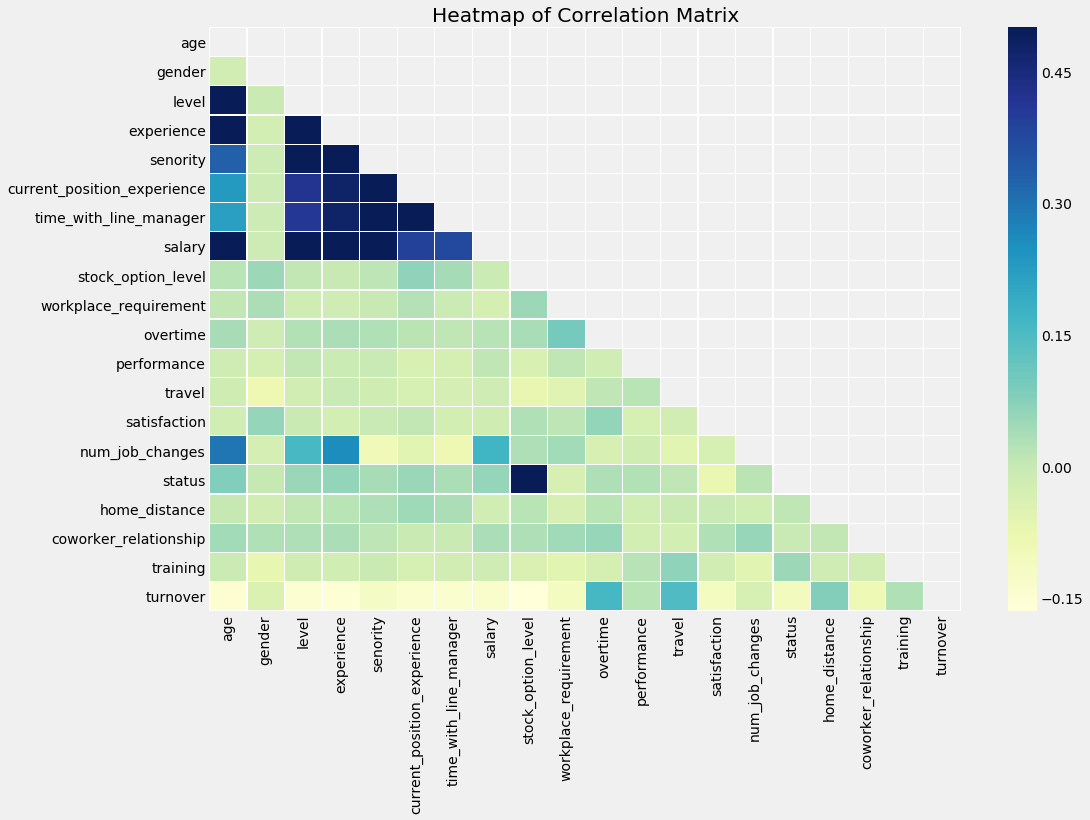

In [153]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmax=.5,mask=mask,linewidths=.2, cmap="YlGnBu")
 #           xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [154]:
#show the correlation matrix
corr

,age,gender,level,experience,senority,current_position_experience,time_with_line_manager,salary,stock_option_level,workplace_requirement,overtime,performance,travel,satisfaction,num_job_changes,status,home_distance,coworker_relationship,training,turnover
age,1.000000,-0.020172,0.524088,0.687366,0.330618,0.231375,0.218759,0.511244,0.019243,0.007513,0.038444,-0.012324,-0.016379,-0.016905,0.294461,0.084683,0.002641,0.044581,-0.008161,-0.147629
gender,-0.020172,1.000000,-0.006022,-0.022499,-0.009020,-0.008731,-0.008911,-0.009337,0.052956,0.033051,-0.012331,-0.027121,-0.086430,0.059791,-0.026319,0.002682,-0.021274,0.027751,-0.066687,-0.041637
level,0.524088,-0.006022,1.000000,0.791640,0.565965,0.420572,0.409497,0.950906,0.008154,-0.014304,0.025443,0.008348,-0.021267,-0.006058,0.158433,0.055495,0.008137,0.032582,-0.015549,-0.147191
experience,0.687366,-0.022499,0.791640,1.000000,0.647456,0.478230,0.477420,0.786790,0.000583,-0.013049,0.034959,-0.008058,-0.001380,-0.023655,0.258613,0.063272,0.018418,0.035221,-0.016693,-0.153021
senority,0.330618,-0.009020,0.565965,0.647456,1.000000,0.764174,0.776527,0.551905,0.013757,-0.000115,0.029856,-0.002723,-0.014064,-0.002815,-0.095644,0.039301,0.031510,0.014334,-0.004990,-0.118936
current_position_experience,0.231375,-0.008731,0.420572,0.478230,0.764174,1.000000,0.724133,0.390541,0.068155,0.022532,0.015580,-0.034719,-0.031139,0.008849,-0.055597,0.053972,0.048505,-0.003501,-0.029554,-0.140553
time_with_line_manager,0.218759,-0.008911,0.409497,0.477420,0.776527,0.724133,1.000000,0.374930,0.042953,-0.006549,0.010578,-0.027070,-0.024760,-0.022372,-0.085365,0.034491,0.035313,-0.004431,-0.021582,-0.139427
salary,0.511244,-0.009337,0.950906,0.786790,0.551905,0.390541,0.374930,1.000000,-0.006286,-0.028098,0.021378,0.011831,-0.011740,-0.015003,0.167971,0.059866,-0.018205,0.034209,-0.011368,-0.134263
stock_option_level,0.019243,0.052956,0.008154,0.000583,0.013757,0.068155,0.042953,-0.006286,1.000000,0.051201,0.036308,-0.035527,-0.068660,0.027967,0.031441,0.568964,0.018025,0.031957,-0.037430,-0.164390
workplace_requirement,0.007513,0.033051,-0.014304,-0.013049,-0.000115,0.022532,-0.006549,-0.028098,0.051201,1.000000,0.100288,0.011380,-0.052962,0.013244,0.045631,-0.032266,-0.032804,0.046907,-0.055710,-0.110760


In [155]:
# Find correlations with the target and sort
correla = df.corr()['turnover'].sort_values()
print('Most Positive Correlations: \n', correla.tail(6))
print('\nMost Negative Correlations: \n', correla.head(9))


Most Positive Correlations: 
 performance      0.019215
training         0.029208
home_distance    0.082095
travel           0.147521
overtime         0.162027
turnover         1.000000
Name: turnover, dtype: float64

Most Negative Correlations: 
 stock_option_level            -0.164390
experience                    -0.153021
age                           -0.147629
level                         -0.147191
current_position_experience   -0.140553
time_with_line_manager        -0.139427
salary                        -0.134263
senority                      -0.118936
satisfaction                  -0.111387
Name: turnover, dtype: float64


# First observations 

The strongest positive correlations with the target features are: 'overtime', 'travel','home distance','training'
The strongest negative correlations with the target features are: 'stock_option_level','experience','age','level', 'time_with_line_manager','salary','senority' and 'satisfaction'.

The dataset is imbalanced with the majoriy of observations describing Currently Active Employees, and there are more correlations negative than positive, moreover 'experience' and  'current_position_experience' they seem redundant especially for younger employees.

Other observations from correlations matrix and from Turnover Summary, tell me that people under 35 years old, single that spend few time with line manager and have to work overtime show higher proportion of leavers compared to their counterparts.

From the first observations I think that Facial Inc. is not very interested in attracting new recruits at the beginning of their career.

But let's see in detail the analysis of the features available to us.

# Analysis of satisfaction of employees

In [156]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )


The mean for the employee population is: 1.8285
The mean for the employees that had a turnover is: 1.475


In [157]:
#show the Dipartement with more turnover
df[['department', 'turnover']].groupby(['department'], as_index=False).mean().sort_values(by='turnover', ascending=False)


,department,turnover
0,Engineer,0.167702
1,Research & Development,0.079746
2,Staff,0.060000


In [158]:
#show the position with more turnover
df[['position', 'turnover']].groupby(['position'], as_index=False).mean().sort_values(by='turnover', ascending=False)


,position,turnover
0,Data Engineer,0.378049
3,Laboratory Technician,0.165138
8,System Engineer,0.116223
7,Research Scientist,0.100000
2,Human Resources,0.075000
1,Healthcare Representative,0.054795
5,Manufacturing Director,0.040179
4,Manager,0.022599
6,Research Director,0.011696


In [159]:
#show the major with more turnover
df[['major', 'turnover']].groupby(['major'], as_index=False).mean().sort_values(by='turnover', ascending=False)


,major,turnover
0,Human Resources,0.200000
4,Technical Degree,0.140426
1,Life Sciences,0.089695
2,Medical,0.074394
3,Other,0.035714


In [160]:
#Let's conduct a t-test  :
staval=stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], popmean = emp_population_satisfaction)  
#The test result shows the test statistic "t" is equal to -4.44. This test statistic 
#tells us how much the sample mean deviates from the null hypothesis. 
#If the t-statistic lies outside the quantiles of the t-distribution corresponding to our 
#confidence level and degrees of freedom, we reject the null hypothesis. 
staval

Ttest_1sampResult(statistic=-4.443635446360207, pvalue=1.4671964697806024e-05)

The test result shows the test statistic "t" is equal to -4.443. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

In [161]:
#We can check the quantiles with stats.t.ppf():
#If the t-statistic value we calculated above (-4.44) is outside the quantiles, 
#then we can reject the null hypothesis

degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9718962236316093
The t-distribution right quartile range is: 1.9718962236316089


T-Test = -4.443 | P-Value = 1.47e-05 | Reject Null Hypothesis
Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population.

# We analyze the distributions for the main features,Turnover VS No Turnover

Text(0.5, 1.0, 'Employee Satisfaction Distribution: 0= low, 1= medium, 2= high, 3= very high - Turnover V.S. No Turnover')

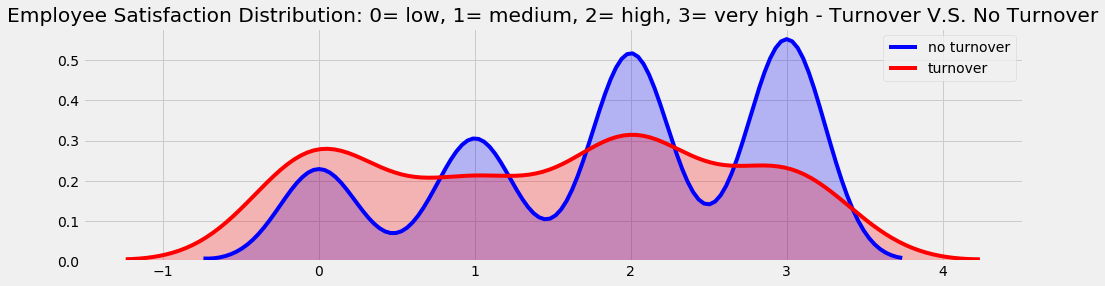

In [162]:
# satisfaction distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution: 0= low, 1= medium, 2= high, 3= very high - Turnover V.S. No Turnover')


Text(0.5, 1.0, 'Employee Salary Distribution - Turnover V.S. No Turnover')

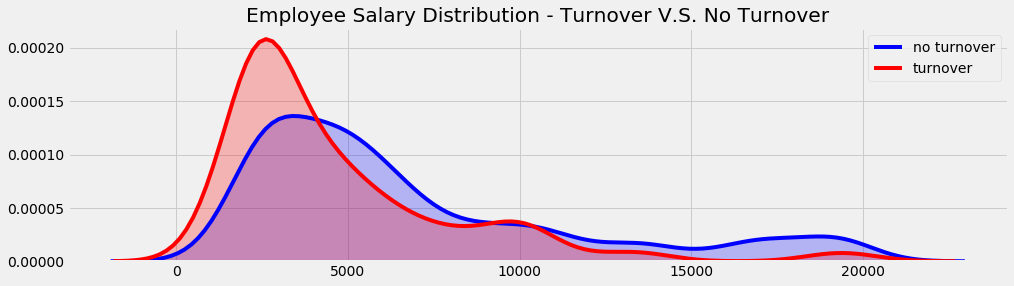

In [163]:
#salary distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'salary'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'salary'] , color='r',shade=True, label='turnover')
plt.title('Employee Salary Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee stock_option_level Distribution - Turnover V.S. No Turnover')

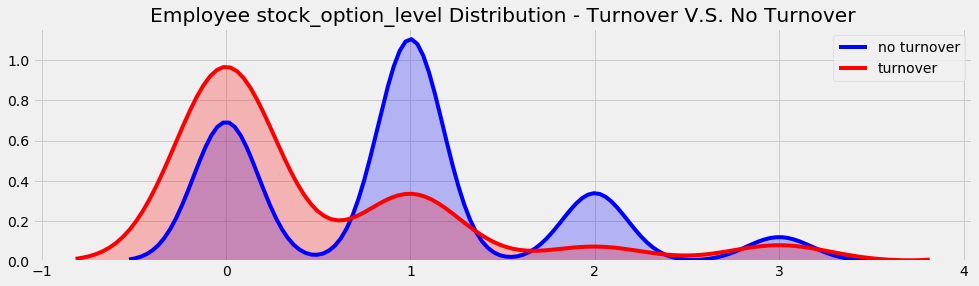

In [164]:
#stock option distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'stock_option_level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'stock_option_level'] , color='r',shade=True, label='turnover')
plt.title('Employee stock_option_level Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee experience Distribution - Turnover V.S. No Turnover')

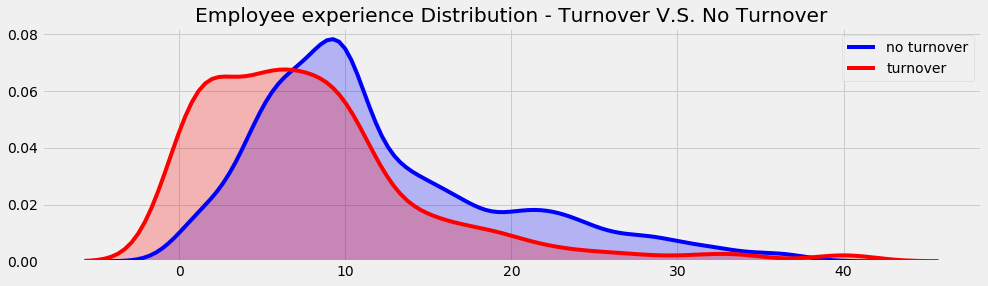

In [165]:
#experience distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'experience'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'experience'] , color='r',shade=True, label='turnover')
plt.title('Employee experience Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee overtime Distribution 0=N0, 1=Yes - Turnover V.S. No Turnover')

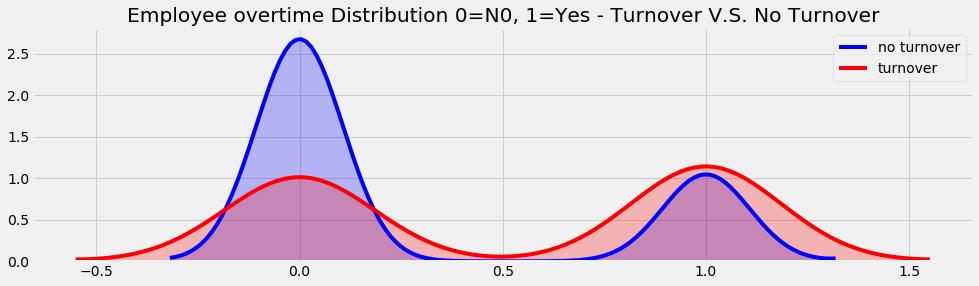

In [166]:
#overtime distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'overtime'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'overtime'] , color='r',shade=True, label='turnover')
plt.title('Employee overtime Distribution 0=N0, 1=Yes - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee time_with_line_manager Distribution - Turnover V.S. No Turnover')

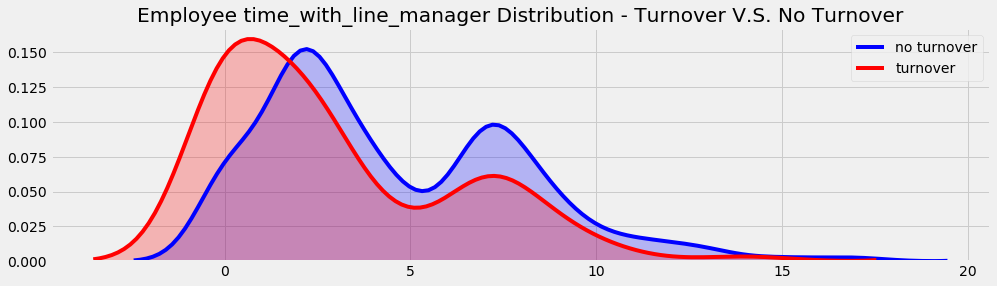

In [167]:
#time line manager distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'time_with_line_manager'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'time_with_line_manager'] , color='r',shade=True, label='turnover')
plt.title('Employee time_with_line_manager Distribution - Turnover V.S. No Turnover')


Text(0.5, 1.0, 'Employee age Distribution - Turnover V.S. No Turnover')

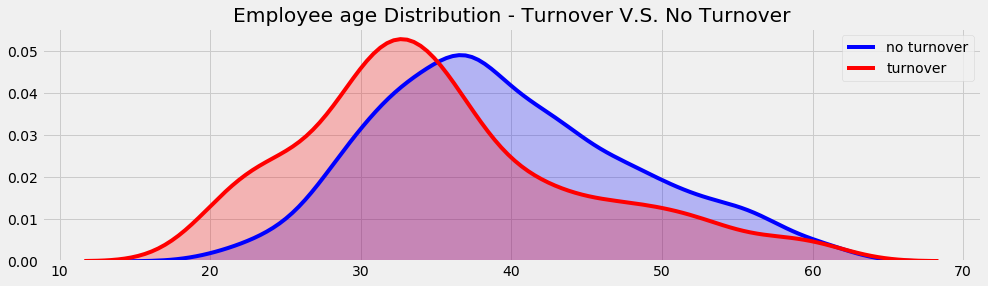

In [168]:
#age distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'age'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'age'] , color='r',shade=True, label='turnover')
plt.title('Employee age Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee level Distribution - Turnover V.S. No Turnover')

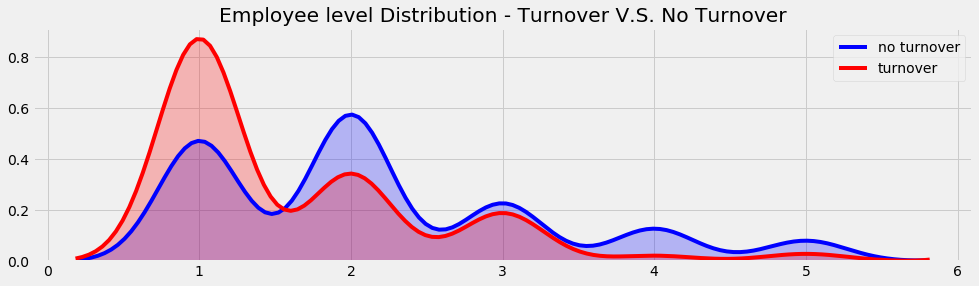

In [169]:
#level distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'level'] , color='r',shade=True, label='turnover')
plt.title('Employee level Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee current_position_experience Distribution - Turnover V.S. No Turnover')

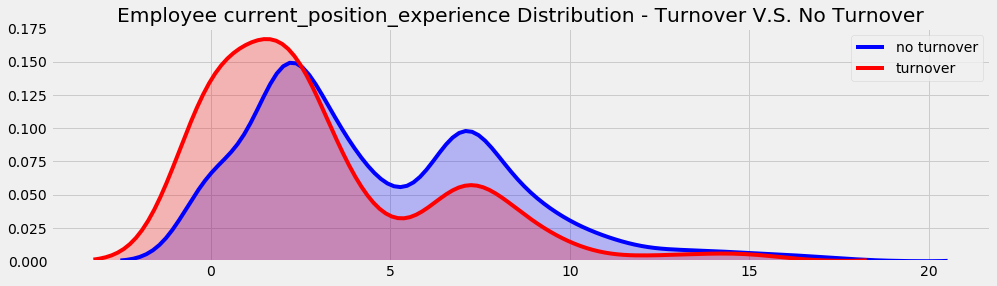

In [170]:
#current position distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'current_position_experience'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'current_position_experience'] , color='r',shade=True, label='turnover')
plt.title('Employee current_position_experience Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee status Distribution - Where :0=single 1=married 2=divorced')

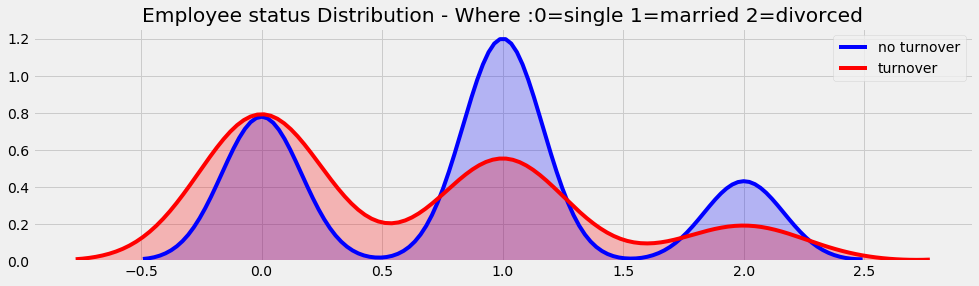

In [171]:
#status distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'status'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'status'] , color='r',shade=True, label='turnover')
plt.title('Employee status Distribution - Where :0=single 1=married 2=divorced')

Text(0.5, 1.0, 'Employee senority Distribution')

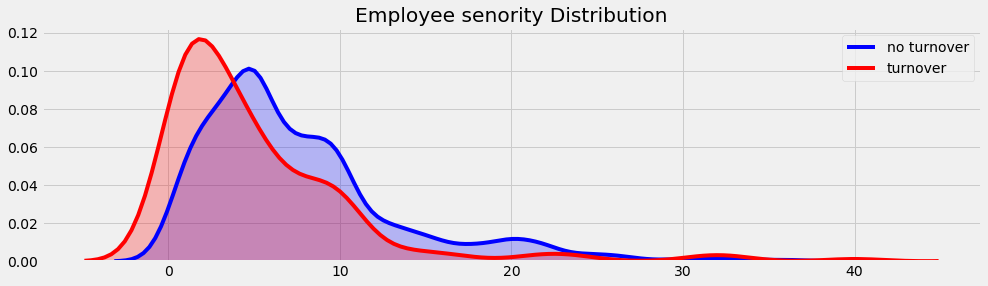

In [172]:
#senority distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'senority'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'senority'] , color='r',shade=True, label='turnover')
plt.title('Employee senority Distribution')

Text(0.5, 1.0, 'Employee current position experience Distribution')

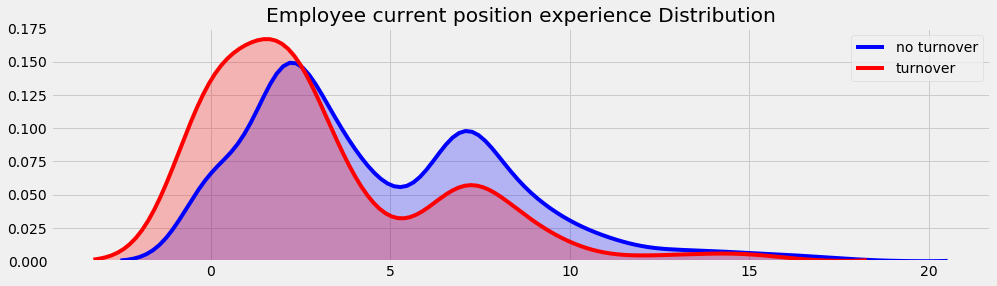

In [173]:
#current_position_experience distribution
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'current_position_experience'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'current_position_experience'] , color='r',shade=True, label='turnover')
plt.title('Employee current position experience Distribution')

Now analyzing Relationship between salary and experience with cluster analysis using K-means algorithm, it's easy understand that employees who leaves the company have few experience and low salary​.

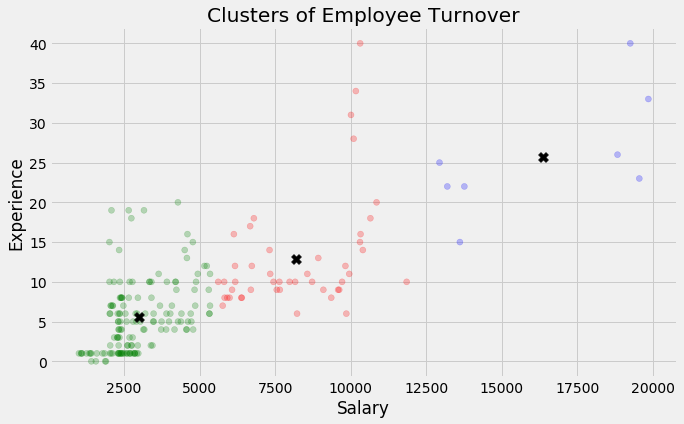

In [174]:
# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["salary","experience"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="salary",y="experience", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# Observation before machine learning analysis

1- The employees with higher salaries and more responsibilities show lower proportion of leavers compared to their counterparts    and I think that this is influenced by high livel of stock option level.

2- Single  and under 35 years old employees show the largest proportion of leavers, compared to Married and Divorced    counterparts.

3- Employees left when they reach their 3-year anniversary at the company.

4- People who live further away from their work show higher proportion of leavers compared to their counterparts.

5-People who have to work overtime show higher proportion of leavers compared to their counterparts.

6-Employee who have low salary and not more experience show a significant percentage of Leavers in the submitted dataset.

7- Employees that spend few time with line manager from Engineer departement and as position of Data Engineer   show higher proportion of leavers compared to their counterparts.

# Machine Learning

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values.

In [175]:
#import library for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [176]:
#read data
pathScripts="C:\\Users\\antonio.castiglione\\codiciPy\\"
df2=pd.read_csv(pathScripts+'\\dfTurnover1.csv',sep=',')
df2=pd.DataFrame(df2)
df2=df2.drop(df2.columns[[0]], axis=1)


In [177]:
# Create dummy variables for the 'department' and 'position' features, since they are categorical 
department = pd.get_dummies(data=df2['department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
position = pd.get_dummies(data=df2['position'],drop_first=True,prefix='pos')
education = pd.get_dummies(data=df2['education_level'],drop_first=True,prefix='edu')
major = pd.get_dummies(data=df2['major'],drop_first=True,prefix='maj')
df2.drop(['department','position','education_level','major'],axis=1,inplace=True)
df2 = pd.concat([df2,department,position,education,major],axis=1)


In [178]:
df2.head()

,age,gender,level,experience,senority,current_position_experience,time_with_line_manager,salary,stock_option_level,workplace_requirement,...,pos_Research Scientist,pos_System Engineer,edu_college,edu_doctor,edu_highschool graduated,edu_master,maj_Life Sciences,maj_Medical,maj_Other,maj_Technical Degree
0,21,0,1,1,0,0,0,2325,0,2,...,0,0,0,0,1,0,0,0,0,1
1,24,1,1,3,2,1,1,2523,1,2,...,0,0,0,0,1,0,0,0,0,1
2,24,1,1,3,2,2,2,2773,0,0,...,1,0,0,0,1,0,0,1,0,0
3,24,0,2,4,3,2,2,4171,1,1,...,0,0,0,0,1,0,1,0,0,0
4,24,1,1,1,0,0,0,2853,1,2,...,1,0,0,0,0,1,1,0,0,0


In [179]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

# Create train and test splits and scaling variables for machine learning
target_name = 'turnover'
X = df2.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df2[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)



Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In [180]:
# Check accuracy of Logistic Regression Model
logis = LogisticRegression(penalty='l2', C=1)
logis.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, logis.predict(X_test)))
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
######probability leaves employee
probslog = logis.predict_proba(X_test)[:, 1] # predict probabilities associated with the employee leaving
logisProb_roc_auc = roc_auc_score(y_test, probslog) # calculate AUC score using test dataset
print('AUC score: %.3f' % logisProb_roc_auc)


Logistic accuracy is 0.92
Logistic AUC = 0.63
AUC score: 0.890


C:\Users\antonio.castiglione\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [181]:
#report for logistic regression
print(classification_report(y_test,logis.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       360
           1       0.79      0.28      0.41        40

   micro avg       0.92      0.92      0.92       400
   macro avg       0.86      0.63      0.68       400
weighted avg       0.91      0.92      0.90       400



A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting and can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.
 Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

In [182]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10, class_weight="balanced")
rf.fit(X_train, y_train)
print("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf.predict(X_test)))
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
######probability leaves employee
probsrf = rf.predict_proba(X_test)[:, 1] # predict probabilities associated with the employee leaving
rfProb_roc_auc = roc_auc_score(y_test, probsrf) # calculate AUC score using test dataset
print('AUC score: %.3f' % rfProb_roc_auc)


Random Forest accuracy is 0.93
Random Forest AUC = 0.68
AUC score: 0.858


In [183]:
#report for random forest
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       360
           1       0.83      0.38      0.52        40

   micro avg       0.93      0.93      0.93       400
   macro avg       0.88      0.68      0.74       400
weighted avg       0.92      0.93      0.92       400



AdaBoost, short for “Adaptive Boosting”. It focuses on classification problems and aims to convert a set of weak classifiers into a strong one.
AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. 

In [184]:
#adaboost model
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
print ("AdaBoost accuracy is %2.2f" % accuracy_score(y_test, ada.predict(X_test)))
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
######probability leaves employee
probsada = ada.predict_proba(X_test)[:, 1] # predict probabilities associated with the employee leaving
adaProb_roc_auc = roc_auc_score(y_test, probsada) # calculate AUC score using test dataset
print('AUC score: %.3f' % adaProb_roc_auc)


AdaBoost accuracy is 0.92
AdaBoost AUC = 0.70
AUC score: 0.890


In [185]:
#report adaboost
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       360
           1       0.68      0.42      0.52        40

   micro avg       0.92      0.92      0.92       400
   macro avg       0.81      0.70      0.74       400
weighted avg       0.91      0.92      0.91       400



A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [186]:
#decision tree model
dtree = tree.DecisionTreeClassifier(max_depth=3,class_weight="balanced",min_weight_fraction_leaf=0.01)
dtree.fit(X_train, y_train)
print ("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test)))
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
######probability leaves employee
probsdtree = dtree.predict_proba(X_test)[:, 1] # predict probabilities associated with the employee leaving
dtreeProb_roc_auc = roc_auc_score(y_test, probsdtree) # calculate AUC score using test dataset
print('AUC score: %.3f' % dtreeProb_roc_auc)


Decision Tree accuracy is 0.69
Decision Tree AUC = 0.70
AUC score: 0.775


In [187]:
#report decision tree model
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       360
           1       0.20      0.72      0.32        40

   micro avg       0.69      0.69      0.69       400
   macro avg       0.58      0.70      0.56       400
weighted avg       0.88      0.69      0.75       400



From the results obtained the best algorithms seem to be the Random Forest and Adaboost, I want to capare their confusion matrix that is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix.

Text(0.5, 384.1600000000001, 'Predicted label')

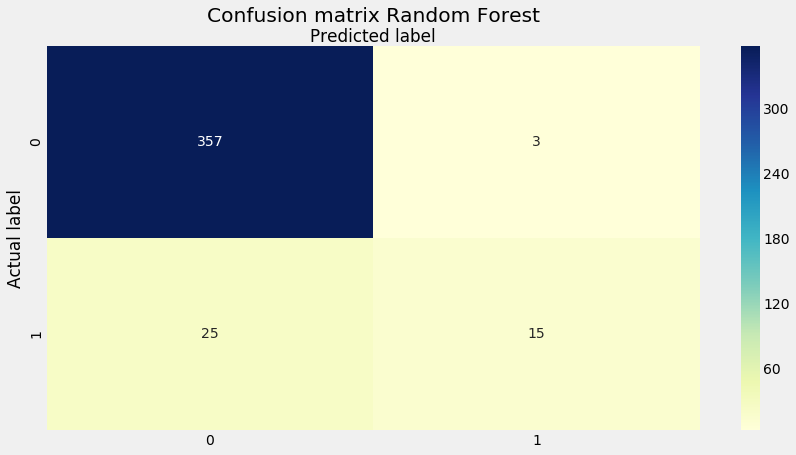

In [188]:
## Confusion Matrix Random Forest
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 384.1600000000001, 'Predicted label')

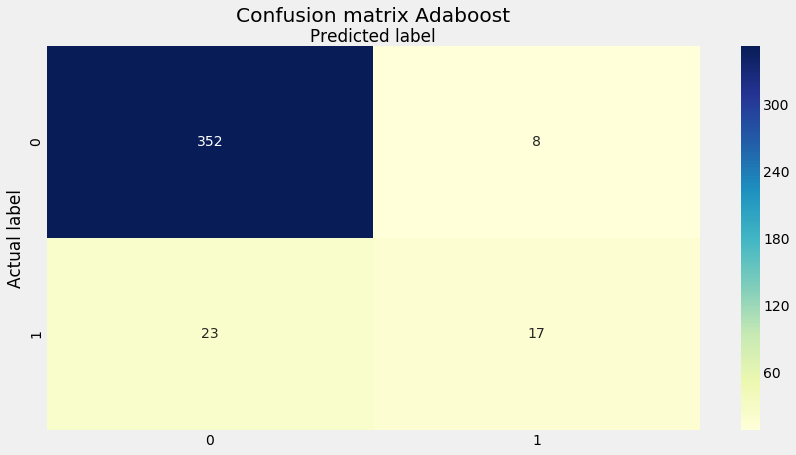

In [189]:
## Confusion Matrix Adaboost
cnf_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Adaboost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

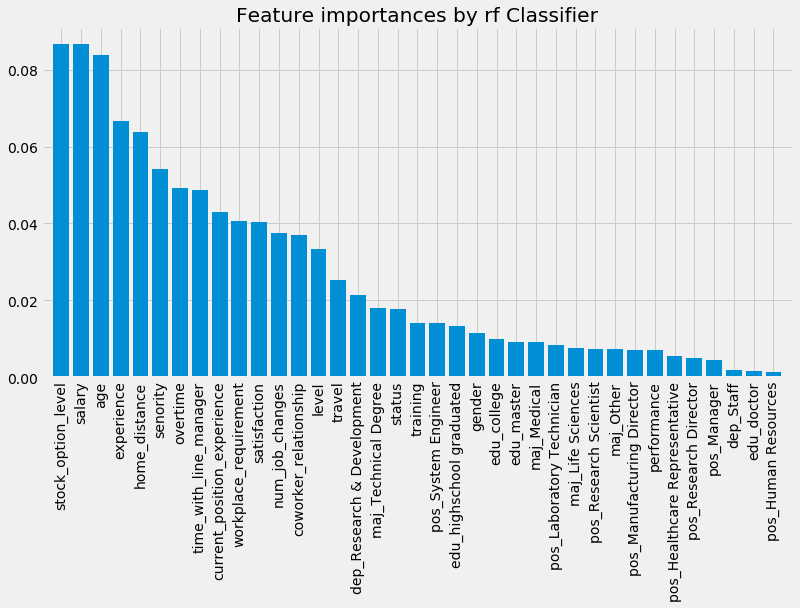

In [190]:
## plot the importances random forest ##
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

importances = rf.feature_importances_
names = df2.drop(['turnover'],axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances by rf Classifier")
plt.bar(range(len(indices)), importances[indices],  align="center")

plt.xticks(range(len(indices)), names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Random Forest allows us to know which features are of the most importance in predicting the target feature, the plot show features by their importance.

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

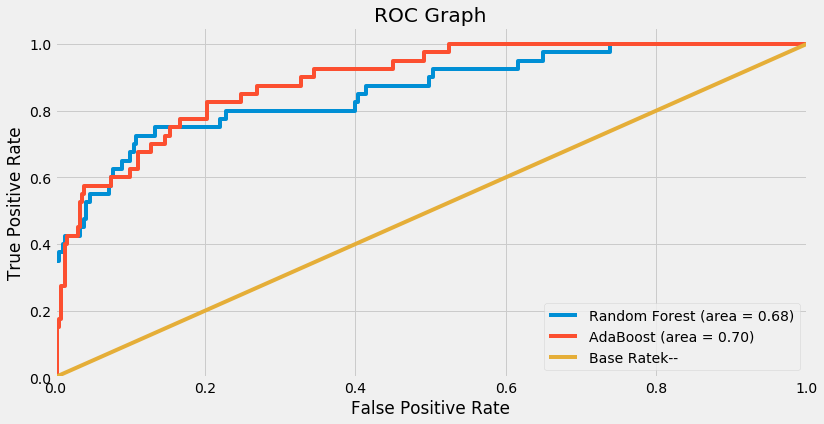

In [191]:
# Create ROC Graph
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()



As shown above, the fine-tuned Ada boost model showed a higher AUC score compared to the Random Forest Classifier


Observing the ROC Curve and the data that have produced this curve we can be assigning a Turnover Probability based on the predicted label such that:

Employees with label < 0.6 have low probability to leave Facial.Inc

Employees with label between 0.6 and 0.8 have medium probability to leave Facial.Inc

Employees with label > 0.8 have probability to leave Facial.Inc

# Conclusion and reasons of turnover in Facial Inc.

Premise: surely having more data, instead of just 2000 records, would have allowed better results.

After analyzing the dataset using different mathematical and  statistical techniques we can draw the following conclusions:

The analysis through Machine Learning, as far as features are concerned, has confirmed, in broad terms, what was found through the correlation matrix.

The stronger indicators of turnover include:

1-Age: Employees in relatively young age under 35 and single are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

2-Salary: Employees with salary under 4800 are more likely to leave and have a Level more low (1,62) than other employees that not leaves the company.

3-Stok Option Level:Having a low level of stock options does not discourage employees from leaving the company

4-Experience:whoever leaves has less experience on average, because younger, it means that Facial Inc. neglects its employees with a junior profile.

5- Time with Line Manager: A large number of leavers leave before 3 years with Line Managers.By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken by Facial Inc with a Line Manager, for example the number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency

6-Over Time: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.

7-Home distance: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area. 

8_Senority:employees who have little senority, about 5 years, are more likely to leave the company, this featurs is closely related to others such as age, experience, stock options and salary.

9-Satisfaction:obviously satisfaction is an important index and is closely connected to the other variables, it must be said that even in those who remain it was not found on average not a great satisfaction, but probably for other factors prefers to remain in Facial Inc.




Surely the first step by Facial Inc. would be to motivate and give attention to the most junior employees, focusing on how to make life in the company more attractive and enjoyable.face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions.
Also to question the line manager with more turnover( for example in Engineer Department that has the highest average turnover) to understand his difficulties in relating to the employees most at risk based on the features analyzed.